<a href="https://colab.research.google.com/github/anshaj-coder/machine-learning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

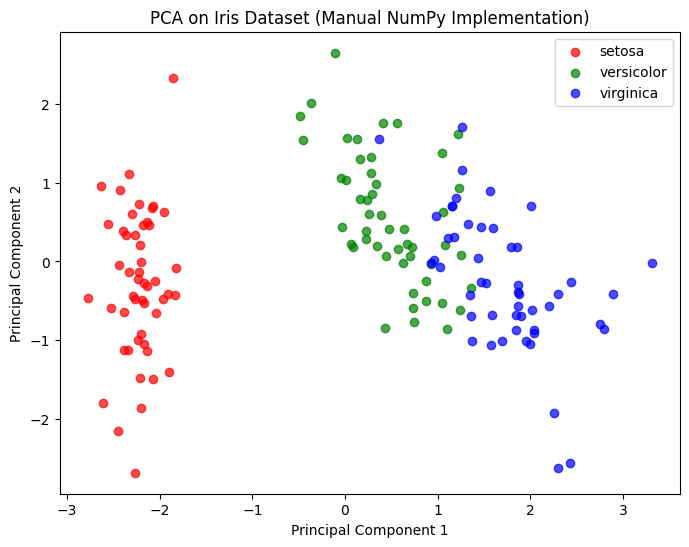

Explained variance ratio (first 2 components): [0.72962445 0.22850762]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

cov_matrix = np.cov(X_scaled.T)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

W = eigenvectors[:, :2]
X_pca = X_scaled.dot(W)

plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']
for target, color in zip([0, 1, 2], colors):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1],
                label=target_names[target], alpha=0.7, c=color)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Iris Dataset (Manual NumPy Implementation)")
plt.legend()
plt.show()

explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("Explained variance ratio (first 2 components):", explained_variance_ratio[:2])
